# Conversion-fraud-in-Digital-Advertising

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv("Training Data.csv")
test_df = pd.read_csv("Test Data.csv")

In [6]:
train_df.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,2,264496,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348022.0,NaN,NaN,NaN,NaN,NaN,333495,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,2,264496,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348024.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,2,264503,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348027.0,NaN,NaN,NaN,NaN,NaN,128491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,2,264496,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348023.0,NaN,NaN,NaN,NaN,NaN,"232,809,333,496",348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1.0,1,NaN,3296,NaN,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,2,264496,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [7]:
train_df.shape

(965, 56)

In [8]:
test_df.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,NaN,0,1,348012,NaN,196047.0,NaN,42860785.0,1.0,NaN,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [9]:
train_df.columns

Index(['clientid_cr', 'clmbuserid_cr', 'conversiontime_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
       'bundleId_cr

In [10]:
len(train_df.columns)

56

### Data Preprocessing and Feature Engineering

#### Let's fill the empty cells

In [11]:
train_df.isnull().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
ip_cr                             20
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
m

In [12]:
train_df.isnull().mean()*100

clientid_cr                        0.000000
clmbuserid_cr                      0.000000
conversiontime_cr                  0.000000
imprid_cr                          0.000000
adslotdimid_cr                     0.000000
algo_cr                            2.072539
audiences_cr                      20.621762
clickbid_cr                       30.673575
geodimid_cr                        0.000000
ip_cr                              2.072539
itemcolumbiaid_cr                  0.000000
itemid_cr                          0.000000
position_cr                        2.072539
pubclientid_cr                     0.000000
refurl_cr                         12.953368
siteId_cr                          0.000000
templateid_cr                     11.088083
goalid_cr                          0.000000
time_cr                            0.000000
adLogType_cr                       0.000000
v_cr                               0.103627
allAudiences_cr                    4.870466
pricingtype_cr                  

#### Let's drop the features first which are having more than 40% of the NAN values 

In [13]:
features_not_needed = []
for feature in train_df.columns:
    if train_df[feature].isnull().mean()*100 >= 40:
        features_not_needed.append(feature)

In [14]:
features_not_needed

['deviceId_cr',
 'uvh_cr',
 'uv_cr',
 'platformId_cr',
 'sdkVersion_cr',
 'usrClusterId_cr',
 'siteClusterIds_cr',
 'refClusterId_cr',
 'paid_cr',
 'spend_cr',
 'attributionType_cr',
 'conversionid_cr',
 'optimize_on_cr',
 'bundleId_cr']

In [15]:
train_df = train_df.drop(features_not_needed, axis = "columns")

In [16]:
train_df.shape

(965, 42)

#### Let us fill the missing values in the numerical features first

In [17]:
def null_values(df, feature_list):
    for col in feature_list:
        print(col, "-->", df[col].isnull().mean()*100)

In [18]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
numerical_features

['clientid_cr',
 'conversiontime_cr',
 'adslotdimid_cr',
 'algo_cr',
 'clickbid_cr',
 'geodimid_cr',
 'itemcolumbiaid_cr',
 'itemid_cr',
 'position_cr',
 'pubclientid_cr',
 'siteId_cr',
 'templateid_cr',
 'goalid_cr',
 'time_cr',
 'adLogType_cr',
 'v_cr',
 'pricingtype_cr',
 'osId_cr',
 'browserId_cr',
 'cityId_cr',
 'stateId_cr',
 'modelDimId_cr',
 'lookUpFrom_cr',
 'ispDimId_cr',
 'countryDimId_cr',
 'goalTypeId_cr',
 'conversionDurationInMillis_cr',
 'impressionTimeInMillis_cr',
 'clickTimeInMillis_cr',
 'osVerDimId_cr',
 'uuidSource_cr',
 'geoGrpDimId_cr',
 'stateGrpDimId_cr',
 'cityGrpDimId_cr',
 'conversion_fraud']

In [19]:
null_values(train_df, numerical_features)

clientid_cr --> 0.0
conversiontime_cr --> 0.0
adslotdimid_cr --> 0.0
algo_cr --> 2.072538860103627
clickbid_cr --> 30.67357512953368
geodimid_cr --> 0.0
itemcolumbiaid_cr --> 0.0
itemid_cr --> 0.0
position_cr --> 2.072538860103627
pubclientid_cr --> 0.0
siteId_cr --> 0.0
templateid_cr --> 11.088082901554404
goalid_cr --> 0.0
time_cr --> 0.0
adLogType_cr --> 0.0
v_cr --> 0.10362694300518134
pricingtype_cr --> 0.0
osId_cr --> 2.1761658031088085
browserId_cr --> 2.1761658031088085
cityId_cr --> 2.072538860103627
stateId_cr --> 2.072538860103627
modelDimId_cr --> 2.1761658031088085
lookUpFrom_cr --> 0.0
ispDimId_cr --> 2.072538860103627
countryDimId_cr --> 2.072538860103627
goalTypeId_cr --> 0.0
conversionDurationInMillis_cr --> 2.072538860103627
impressionTimeInMillis_cr --> 2.072538860103627
clickTimeInMillis_cr --> 13.678756476683937
osVerDimId_cr --> 2.1761658031088085
uuidSource_cr --> 2.072538860103627
geoGrpDimId_cr --> 2.072538860103627
stateGrpDimId_cr --> 10.880829015544041
cityG

In [20]:
numerical_features_with_nan = [feature for feature in numerical_features if train_df[feature].isnull().mean() != 0]

In [21]:
numerical_features_with_nan

['algo_cr',
 'clickbid_cr',
 'position_cr',
 'templateid_cr',
 'v_cr',
 'osId_cr',
 'browserId_cr',
 'cityId_cr',
 'stateId_cr',
 'modelDimId_cr',
 'ispDimId_cr',
 'countryDimId_cr',
 'conversionDurationInMillis_cr',
 'impressionTimeInMillis_cr',
 'clickTimeInMillis_cr',
 'osVerDimId_cr',
 'uuidSource_cr',
 'geoGrpDimId_cr',
 'stateGrpDimId_cr',
 'cityGrpDimId_cr']

In [22]:
def plot_hist(df, feature):
    plt.hist(df[feature], color='green')
    plt.title(feature)
    plt.show()

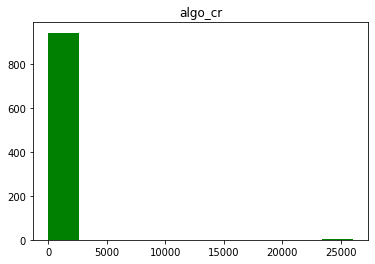

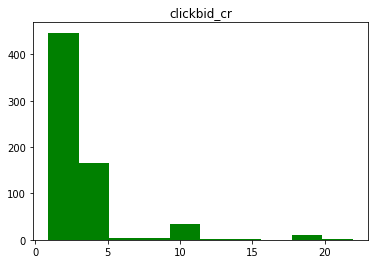

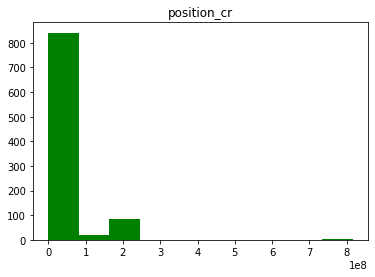

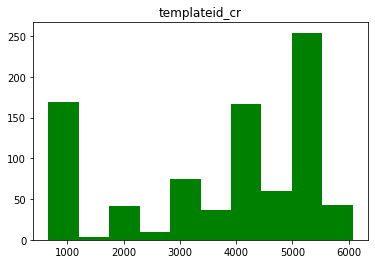

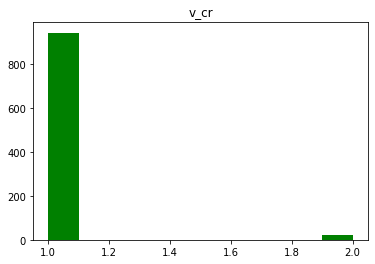

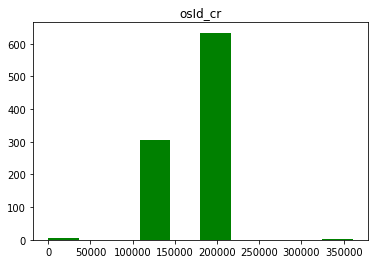

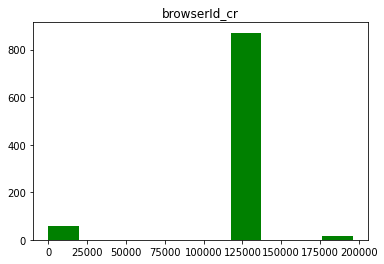

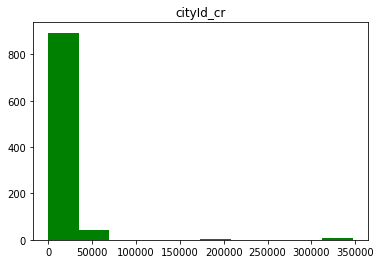

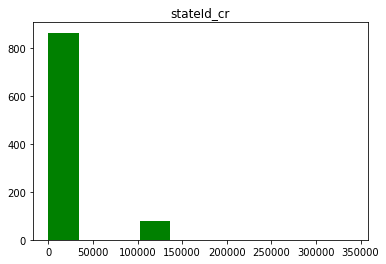

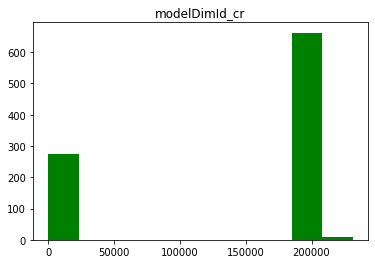

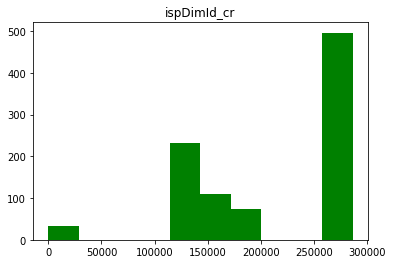

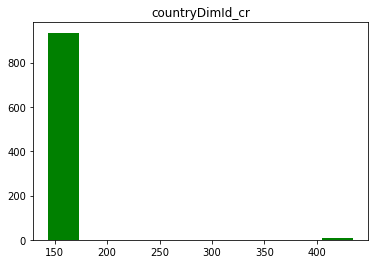

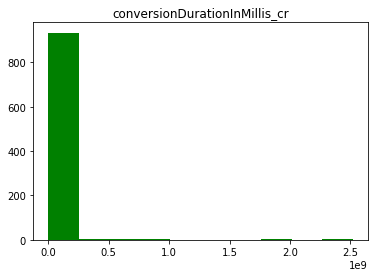

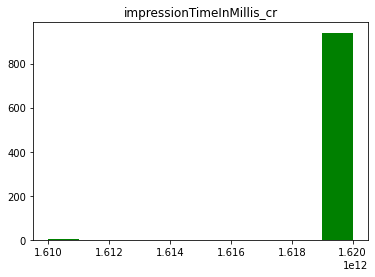

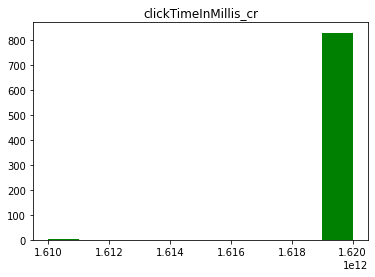

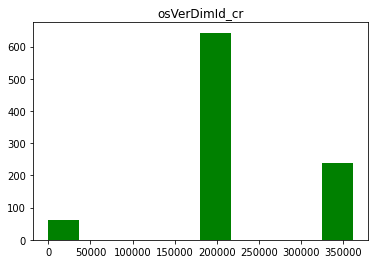

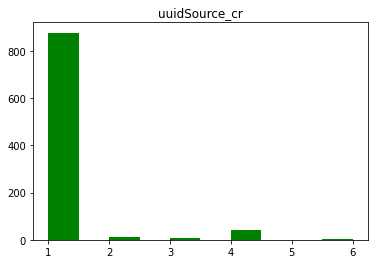

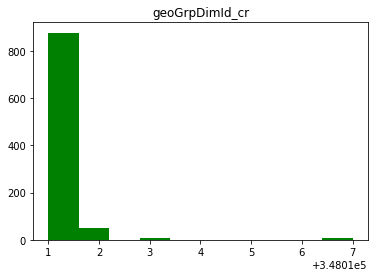

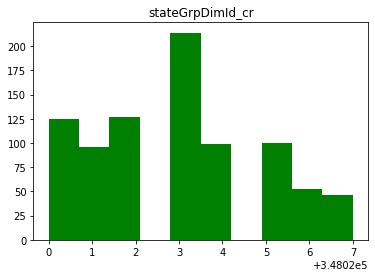

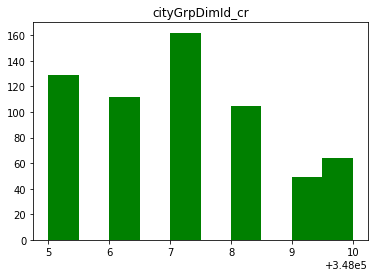

In [23]:
for feature in numerical_features_with_nan:
    plot_hist(train_df, feature)

##### Seems majority of the features are discrete numerical variables

##### Let's fill the missing values using random sample imputation

In [24]:
def impute_nan(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [25]:
for feature in numerical_features_with_nan:
    impute_nan(train_df, feature)

In [26]:
train_df.shape

(965, 42)

In [27]:
train_df.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,2,264496,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348022.0,348007.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,2,264496,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348024.0,348010.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,2,264503,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348027.0,348005.0,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,2,264496,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348023.0,348007.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,2.790000,144,XXX.XXX.XXX.XXX,5614054,53607445,1.0,1,NaN,3296,663.0,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,2,264496,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,348025.0,348007.0,True


In [28]:
null_values(train_df, numerical_features_with_nan)

algo_cr --> 0.0
clickbid_cr --> 0.0
position_cr --> 0.0
templateid_cr --> 0.0
v_cr --> 0.0
osId_cr --> 0.0
browserId_cr --> 0.0
cityId_cr --> 0.0
stateId_cr --> 0.0
modelDimId_cr --> 0.0
ispDimId_cr --> 0.0
countryDimId_cr --> 0.0
conversionDurationInMillis_cr --> 0.0
impressionTimeInMillis_cr --> 0.0
clickTimeInMillis_cr --> 0.0
osVerDimId_cr --> 0.0
uuidSource_cr --> 0.0
geoGrpDimId_cr --> 0.0
stateGrpDimId_cr --> 0.0
cityGrpDimId_cr --> 0.0


#### Filling the missing values in catagorical features

In [29]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O' ]

In [30]:
categorical_features_with_nan = [feature for feature in categorical_features if train_df[feature].isnull().mean() != 0 ]
categorical_features_with_nan

['audiences_cr', 'ip_cr', 'refurl_cr', 'allAudiences_cr', 'connTypeDimId_cr']

In [31]:
null_values(train_df, categorical_features_with_nan)

audiences_cr --> 20.621761658031087
ip_cr --> 2.072538860103627
refurl_cr --> 12.953367875647666
allAudiences_cr --> 4.870466321243523
connTypeDimId_cr --> 2.072538860103627


In [32]:
for feature in categorical_features_with_nan:
    print(feature, "-->", len(train_df[feature].unique()))

audiences_cr --> 441
ip_cr --> 2
refurl_cr --> 400
allAudiences_cr --> 821
connTypeDimId_cr --> 10


In [33]:
train_df['ip_cr'].value_counts()

XXX.XXX.XXX.XXX    945
Name: ip_cr, dtype: int64

In [34]:
#### Seems that this feature ip_cr dosen't contain any valuable information, so let us drop it
train_df.drop(['ip_cr'], axis="columns", inplace=True)

#### let us use the random sample imputation technique to fill the missing values

In [35]:
categorical_features_with_nan.remove('ip_cr')

In [36]:
for feature in categorical_features_with_nan:
    impute_nan(train_df, feature)

In [37]:
null_values(train_df, categorical_features_with_nan)

audiences_cr --> 0.0
refurl_cr --> 0.0
allAudiences_cr --> 0.0
connTypeDimId_cr --> 0.0


In [38]:
train_df.isnull().mean()

clientid_cr                      0.0
clmbuserid_cr                    0.0
conversiontime_cr                0.0
imprid_cr                        0.0
adslotdimid_cr                   0.0
algo_cr                          0.0
audiences_cr                     0.0
clickbid_cr                      0.0
geodimid_cr                      0.0
itemcolumbiaid_cr                0.0
itemid_cr                        0.0
position_cr                      0.0
pubclientid_cr                   0.0
refurl_cr                        0.0
siteId_cr                        0.0
templateid_cr                    0.0
goalid_cr                        0.0
time_cr                          0.0
adLogType_cr                     0.0
v_cr                             0.0
allAudiences_cr                  0.0
pricingtype_cr                   0.0
osId_cr                          0.0
browserId_cr                     0.0
cityId_cr                        0.0
stateId_cr                       0.0
modelDimId_cr                    0.0
l

In [39]:
train_df['conversiontime_cr'].unique()

array([1.62e+12])

##### Now our dataset has no nan values 👍🙌

### Feature Selection using Pearson Correlation

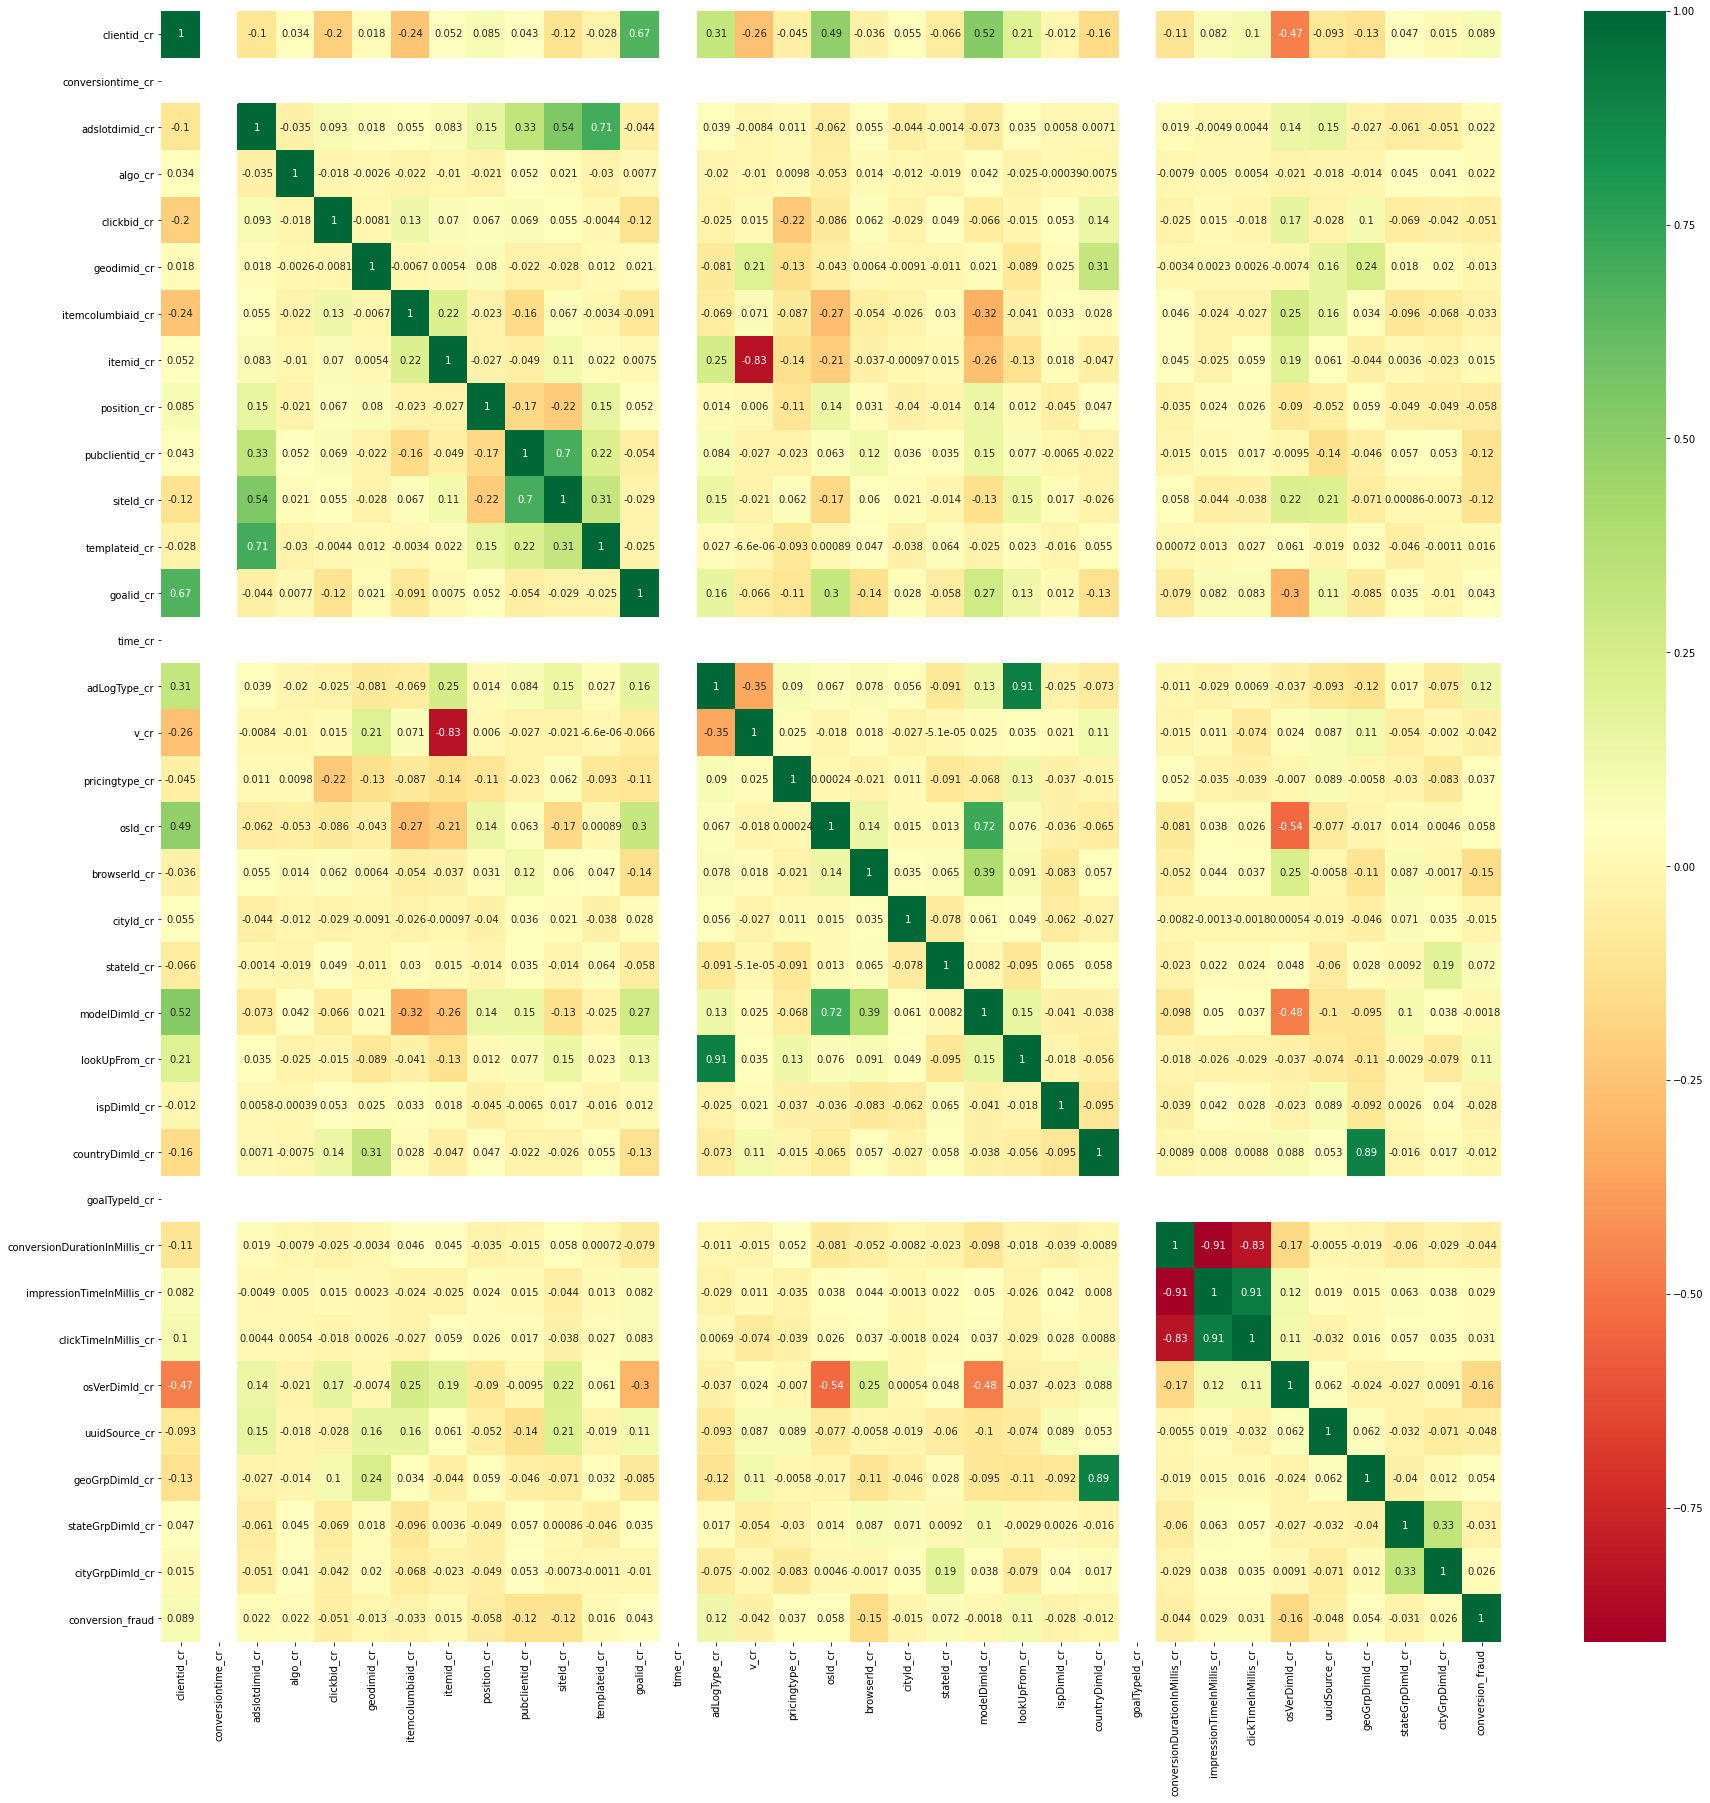

In [40]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

#### From the above correlation matrix, we can infer that there are many features which are highly correlated with other features

#### Let us find and remove the highly features by using the following function

In [41]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
list(correlation(train_df, 0.85))

['lookUpFrom_cr', 'geoGrpDimId_cr', 'clickTimeInMillis_cr']

In [43]:
### Here i am choosing the thresold value as 0.85 and dropping the highly correlated features
train_df.drop(correlation(train_df, 0.85), axis="columns", inplace=True)

In [44]:
train_df.columns

Index(['clientid_cr', 'clmbuserid_cr', 'conversiontime_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr',
       'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'osVerDimId_cr', 'uuidSource_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [45]:
train_df.shape

(965, 38)

In [46]:
train_df.head(10)

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,264496,280429.0,144.0,10,2332.0,1.620000e+12,199452.0,1.0,348022.0,348007.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,10,3201.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,264503,172725.0,144.0,10,2821.0,1.620000e+12,199452.0,1.0,348027.0,348005.0,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,264496,136127.0,144.0,10,3144.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,"8kv,2vk,8gw,2vl",2.790000,144,5614054,53607445,1.0,1,https%3A%2F%2Ftelugu.samayam.com%2Fvideo-galle...,3296,663.0,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,264496,136127.0,144.0,10,42597.0,1.620000e+12,360833.0,1.0,348025.0,348007.0,True
5,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,omf,l32,7dx,592,lo4,oos,p1u,5o2,gau,o6...",16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,10,1237.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
6,75694,10a967f6-c991-4f33-a212-9b42c8a60126-10w2k,1.620000e+12,0fe0e58a-4e84-43f7-97e5-703201ba01fe-1sk24,321300,38.0,"8gw,o3b",3.100000,144,5488088,49504155,2.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,35g,k1m,nqo,2ws,lo4,jzc,2w7,5cc,p1u,5o2,43...",16,196058.0,129639.0,439.0,1815.0,202038.0,264494,136127.0,144.0,10,2632.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
7,75694,6ad61f5f-bf5a-445d-a314-930e94e47fbc-1sjfw,1.620000e+12,f6a9c4e0-8c85-49ce-af8d-d0c6b7288da2-h0hg,355900,39.0,"2vk,8gw,job",3.100000,144,5488773,49504155,1.0,2308,https%3A%2F%2Feconomictimes.indiatimes.com%2Fh...,4,5451.0,6384,1.620000e+12,2,1.0,"kmc,hkf,2wl,kmj,5bz,kmn,lo4,357,apc,p1x,5o2,ga...",16,196063.0,129639.0,0.0,2571.0,202038.0,264502,150208.0,144.0,10,5931.0,1.620000e+12,199414.0,1.0,348024.0,348005.0,True
8,82122,59582f67-7cd3-4748-82d4-15928b166533-6mc0,1.620000e+12,f6885674-956c

#### Let's check the other catogorical features

In [47]:
train_df['clmbuserid_cr']

0      31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
1      4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg
2      cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3      f79f3de7-5edb-4319-9549-117f47996066-10wrk
4      01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
                          ...                    
960          41d7dab3-0ab7-4039-a936-2ceab9dbcbf7
961          39511cf3-0358-4ae9-9fec-fe3a74e98a13
962    e5d4037f-ec67-4d7b-8d83-9012ee7d64b9-1sjac
963    c7491247-f203-48df-b08d-d25d0d873e20-1sjwk
964     20dcb941-42eb-4f0c-8f96-7afe12146264-h0k8
Name: clmbuserid_cr, Length: 965, dtype: object

In [48]:
len(train_df['clmbuserid_cr'].unique())

896

In [49]:
train_df['imprid_cr']

0      01649076-c77f-4d70-afc8-213535427147-1sjd4
1      f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw
2      061edef6-3d9d-408b-884a-ad840e6930ce-10o78
3      0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0
4      0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8
                          ...                    
960    a9371035-94c0-49a9-b807-70e472bb31a9-1sk24
961    a955a5eb-1f0f-4654-8381-9f709bb98a7a-10ni8
962    a97061e8-4863-440a-956c-14c85984c29e-10nw4
963    a974732d-bfa0-4018-b216-b2d1c97f3337-1sj7k
964    a9794d23-4f67-4446-8c34-6fb608435f40-1siz8
Name: imprid_cr, Length: 965, dtype: object

In [50]:
len(train_df['imprid_cr'].unique())

934

In [51]:
train_df['audiences_cr']

0                                                8gw,o3b
1                                        8kv,2vk,8gw,2vl
2                                                8gw,o3b
3                                                8gw,o3b
4                                        8kv,2vk,8gw,2vl
                             ...                        
960    8go,8gr,8k6,8h4,8gv,2vk,8gw,8iy,3si,2x6,nqv,2v...
961                      2x6,8k6,8k8,30r,8gv,2vk,8gw,8j1
962                                  2vv,2vk,8gw,2vb,o3b
963                                          nqv,2vk,8gw
964                                                  8gv
Name: audiences_cr, Length: 965, dtype: object

In [52]:
len(train_df['audiences_cr'].unique())

440

##### Seems these catogorical features are not having any valuable inforamtion and if we do one-hot-encoding,then we may face the issue of "Curse of Dimensionality".
##### So i will  drop those features

In [53]:
train_df.drop(['clmbuserid_cr', 'imprid_cr', 'audiences_cr'], axis="columns", inplace=True)

In [54]:
train_df.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,1.620000e+12,321300,38.0,2.869316,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,264496,280429.0,144.0,10,2332.0,1.620000e+12,199452.0,1.0,348022.0,348007.0,True
1,75694,1.620000e+12,129239,38.0,2.790000,144,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,10,3201.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
2,75694,1.620000e+12,321554,21.0,2.790000,144,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,264503,172725.0,144.0,10,2821.0,1.620000e+12,199452.0,1.0,348027.0,348005.0,True
3,75694,1.620000e+12,321300,38.0,2.790000,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,264496,136127.0,144.0,10,3144.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
4,30431,1.620000e+12,355768,21.0,2.790000,144,5614054,53607445,1.0,1,https%3A%2F%2Ftelugu.samayam.com%2Fvideo-galle...,3296,663.0,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,264496,136127.0,144.0,10,42597.0,1.620000e+12,360833.0,1.0,348025.0,348007.0,True


In [55]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
refurl_cr                         object
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
allAudiences_cr                   object
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr

In [56]:
train_df.head(10)

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,1.620000e+12,321300,38.0,2.869316,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,264496,280429.0,144.0,10,2332.0,1.620000e+12,199452.0,1.0,348022.0,348007.0,True
1,75694,1.620000e+12,129239,38.0,2.790000,144,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,10,3201.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
2,75694,1.620000e+12,321554,21.0,2.790000,144,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,264503,172725.0,144.0,10,2821.0,1.620000e+12,199452.0,1.0,348027.0,348005.0,True
3,75694,1.620000e+12,321300,38.0,2.790000,144,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,264496,136127.0,144.0,10,3144.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
4,30431,1.620000e+12,355768,21.0,2.790000,144,5614054,53607445,1.0,1,https%3A%2F%2Ftelugu.samayam.com%2Fvideo-galle...,3296,663.0,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,264496,136127.0,144.0,10,42597.0,1.620000e+12,360833.0,1.0,348025.0,348007.0,True
5,75694,1.620000e+12,129239,38.0,2.790000,144,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,omf,l32,7dx,592,lo4,oos,p1u,5o2,gau,o6...",16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,10,1237.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
6,75694,1.620000e+12,321300,38.0,3.100000,144,5488088,49504155,2.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,35g,k1m,nqo,2ws,lo4,jzc,2w7,5cc,p1u,5o2,43...",16,196058.0,129639.0,439.0,1815.0,202038.0,264494,136127.0,144.0,10,2632.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
7,75694,1.620000e+12,355900,39.0,3.100000,144,5488773,49504155,1.0,2308,https%3A%2F%2Feconomictimes.indiatimes.com%2Fh...,4,5451.0,6384,1.620000e+12,2,1.0,"kmc,hkf,2wl,kmj,5bz,kmn,lo4,357,apc,p1x,5o2,ga...",16,196063.0,129639.0,0.0,2571.0,202038.0,264502,150208.0,144.0,10,5931.0,1.620000e+12,199414.0,1.0,348024.0,348005.0,True
8,82122,1.620000e+12,233531,21.0,1.000000,145,5526656,47164455,2.0,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1.620000e+12,2,1.0,"o6k,30b,oof,58k,8gw,5bz,lo4,or6,9nj,446,qq6,5o...",16,196061.0,0.0,0.0,2442.0,0.0,264494,265618.0,145.0,10,14810.0,1.620000e+12,0.0,1.0,348022.0,348007.0,True
9,75694,1.620000e+12,356952,18.0,3.100000,144,5488088,49504160,1.0,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1.620000e+12,2,1.0,"hkf,9nj,5xq",16,196058.0,129639.0,439.0,1815.0,202038.0,264496,280429.0,144.0,10,8901.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True


#### There are still more catogorical features which we have to handle 

refurl_cr ,   connTypeDvimId_cr  ,   allAudiences_cr                                                     

In [57]:
len(train_df['refurl_cr'].unique())

399

In [58]:
train_df['refurl_cr']

0      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
1      https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...
2      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
3      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
4      https%3A%2F%2Ftelugu.samayam.com%2Fvideo-galle...
                             ...                        
960        http%3A%2F%2Fnavbharattimes.indiatimes.com%2F
961          http%3A%2F%2Ftimesofindia.indiatimes.com%2F
962    https%3A%2F%2Fwww.sakshieducation.com%2FPrevio...
963                          https%3A%2F%2Fwww.olx.in%2F
964                          https%3A%2F%2Fwww.olx.in%2F
Name: refurl_cr, Length: 965, dtype: object

In [59]:
len(train_df['connTypeDimId_cr'].unique())

9

In [60]:
train_df['connTypeDimId_cr']

0      264496
1      264496
2      264503
3      264496
4      264496
        ...  
960    264494
961    264496
962    264496
963    264494
964    264496
Name: connTypeDimId_cr, Length: 965, dtype: object

This feature 'connTypeDimId_cr' is a numeric catogorical feature

In [61]:
train_df['refurl_cr'][1]

'https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-scores%2F32278%2Find-vs-eng-4th-t20i-england-tour-of-india-2021'

In [62]:
train_df['allAudiences_cr']

0      7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...
1      h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...
2      7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...
3      p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...
4                                                761,75y
                             ...                        
960    7dm,jyq,8h4,k1m,nyw,lo4,nqv,o1w,o1v,apc,o1y,o1...
961    jyq,ige,33h,41f,mss,oy7,nyw,oy9,lo4,ii1,nqx,o1...
962                                                  9nj
963                                          hkf,9nj,5xq
964                                          hkf,9nj,5xq
Name: allAudiences_cr, Length: 965, dtype: object

In [63]:
len(train_df['allAudiences_cr'].unique())

820

#### Again We need to drop these unwanted features

In [64]:
cols_not_needed = ['refurl_cr', 'allAudiences_cr']

In [65]:
train_df.drop(cols_not_needed, axis="columns", inplace=True)

We need to convert the feature 'connTypeDimId_cr' from object to float

In [66]:
train_df['connTypeDimId_cr'] = pd.to_numeric(train_df['connTypeDimId_cr'], errors='coerce')

Seems this feature 'connTypeDimId_cr' is having few missing values let's fill it

In [67]:
train_df['connTypeDimId_cr'].isnull().mean()*100

0.7253886010362695

In [68]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

#### Seems that the feature connTypeDimId_cr has few missing values

In [69]:
train_df[pd.to_numeric(train_df.connTypeDimId_cr,errors='coerce').isnull()==True]

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
203,29892,1.620000e+12,334766,33.0,2.79,433,5592344,53924039,1.0,76969,2923,4745.0,469,1.620000e+12,1,1.0,16,129311.0,129433.0,2942.0,2929.0,0.0,NaN,0.0,433.0,10,3670493.0,1.620000e+12,360833.0,3.0,348021.0,348009.0,False
309,25470,1.620000e+12,236059,2.0,2.79,144,5617958,53924418,10.0,15240,283,2936.0,10553,1.620000e+12,1,1.0,17,129311.0,129433.0,439.0,1815.0,0.0,NaN,136127.0,144.0,10,19311004.0,1.620000e+12,360833.0,3.0,348023.0,348007.0,False
422,2139,1.620000e+12,195755,18.0,10.00,144,5610374,53184763,2.0,7268,85,1042.0,722,1.620000e+12,1,1.0,6,129311.0,129433.0,10278.0,1808.0,0.0,NaN,136127.0,144.0,10,684436.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
630,31365,1.620000e+12,195755,18.0,0.90,144,5616679,53930184,2.0,7268,85,1042.0,4265,1.620000e+12,1,1.0,16,129311.0,129433.0,437.0,1808.0,0.0,NaN,280429.0,144.0,10,13152725.0,1.620000e+12,360833.0,3.0,348020.0,348006.0,False
676,25470,1.620000e+12,355148,38.0,2.79,144,5614752,53924415,1.0,2316,76,2495.0,10553,1.620000e+12,1,1.0,17,129311.0,129433.0,10243.0,1803.0,0.0,NaN,280429.0,144.0,10,44955769.0,1.620000e+12,359921.0,3.0,348026.0,348008.0,False
681,31365,1.620000e+12,334762,18.0,2.79,144,5616679,53930182,1.0,76969,2923,4858.0,4265,1.620000e+12,1,1.0,16,129311.0,129433.0,437.0,1808.0,0.0,NaN,280429.0,144.0,10,13239231.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
774,29892,1.620000e+12,355148,18.0,2.79,144,5583264,53924038,1.0,2316,76,2495.0,469,1.620000e+12,1,1.0,16,129311.0,129433.0,0.0,2518.0,0.0,NaN,147211.0,144.0,10,2146992.0,1.620000e+12,359921.0,3.0,348022.0,348007.0,False


In [70]:
len(train_df[pd.to_numeric(train_df.connTypeDimId_cr,errors='coerce').isnull()==True])

7

In [71]:
impute_nan(train_df, 'connTypeDimId_cr')

In [72]:
train_df['connTypeDimId_cr'].isnull().mean()

0.0

In [73]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

In [74]:
train_df['connTypeDimId_cr'].dtypes

dtype('float64')

### Feature Scaling

In [75]:
cols_to_scale = [feature for feature in train_df.columns if feature != 'conversion_fraud']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [76]:
train_df.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,0.873346,0.0,0.830089,0.001423,0.09359,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.642461,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.001256,0.005294,0.873648,0.222222,0.979856,0.0,0.0,8.463155e-07,1.0,0.551815,0.0,0.285714,0.4,True
1,0.873346,0.0,0.000527,0.001423,0.08982,0.0,0.944648,0.867568,1.225933e-09,0.179221,0.053143,0.000000,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.029716,0.005326,0.873648,0.222222,0.475646,0.0,0.0,1.191272e-06,1.0,0.551815,0.0,0.571429,1.0,True
2,0.873346,0.0,0.831186,0.000769,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.643200,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.000000,0.005312,0.873648,1.000000,0.603524,0.0,0.0,1.040428e-06,1.0,0.551815,0.0,1.000000,0.0,True
3,0.873346,0.0,0.830089,0.001423,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.642461,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.029676,0.005320,0.873648,0.222222,0.475646,0.0,0.0,1.168646e-06,1.0,0.551815,0.0,0.428571,0.4,True
4,0.345516,0.0,0.978965,0.000769,0.08982,0.0,0.997236,0.990331,1.225933e-09,0.000000,1.000000,0.000000,0.310276,0.0,1.0,0.0,1.000000,0.358580,0.660130,0.000000,0.005329,0.000000,0.222222,0.475646,0.0,0.0,1.682985e-05,1.0,0.998301,0.0,0.714286,0.4,True


In [77]:
train_df['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


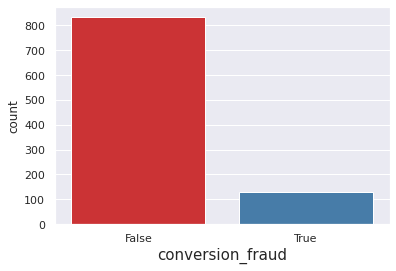

In [78]:
sns.set_theme(style="darkgrid")
sns.countplot(train_df['conversion_fraud'], palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

#### Seems our dataset is imbalanced

In [79]:
train_df['conversion_fraud'].replace({True:1, False:0}, inplace=True)

In [80]:
X = train_df.drop('conversion_fraud', axis="columns")
y = train_df['conversion_fraud']

#### Balancing the dataset

In [81]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X,y = smk.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


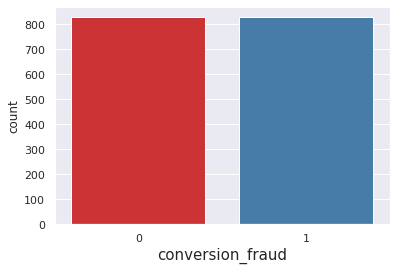

In [82]:
sns.set_theme(style="darkgrid")
sns.countplot(y, palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

##### Now our dataset is balanced

### Train test split

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [84]:
X_train

array([[0.34551561, 0.        , 0.97896519, ..., 0.        , 0.71428571,
        0.76692543],
       [0.87334554, 0.        , 0.83805438, ..., 0.        , 0.27775236,
        0.3777066 ],
       [0.74383403, 0.        , 0.97896519, ..., 0.        , 0.14285714,
        0.        ],
       ...,
       [0.87334554, 0.        , 0.83008885, ..., 0.        , 0.41726749,
        0.4       ],
       [0.74383403, 0.        , 0.97896519, ..., 0.        , 0.57142857,
        1.        ],
       [0.87334554, 0.        , 0.87968694, ..., 0.        , 0.14285714,
        0.        ]])

In [85]:
X.shape

(1658, 32)

## Hyper Parameter Tuning for Machine Learning algorithms

### Logistic Regression

In [86]:
acc=[]
model=[]

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [88]:
lr_score = cross_val_score(LogisticRegression(), X, y, cv=10)
lr_score.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7087039065352319

In [89]:
p=0.7087039065352319
acc.append(p)
model.append("LOGISTIC REGRESSION")


### Decision Tree

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(X, y)
t=clf.predict(X)
b=accuracy_score(y,t)
clf.cv_results_

{'mean_fit_time': array([0.01761234, 0.01474593]),
 'mean_score_time': array([0.00066962, 0.00057061]),
 'mean_test_score': array([0.92102957, 0.92644761]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.88554217, 0.87951807]),
 'split1_test_score': array([0.87349398, 0.86144578]),
 'split2_test_score': array([0.95783133, 0.93373494]),
 'split3_test_score': array([0.95180723, 0.92771084]),
 'split4_test_score': array([0.86746988, 0.92771084]),
 'split5_test_score': array([0.92771084, 0.93373494]),
 'split6_test_score': array([0.91566265, 0.94578313]),
 'split7_test_score': array([0.92168675, 0.95180723]),
 'split8_test_score': array([0.96363636, 0.93939394]),
 'split9_test_score': array([0.94545455, 0.96363636]),
 'std_fit_time': array([0.01197976, 0

In [94]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]
b

1.0

In [95]:
acc.append(b)
model.append("DECISION TREE")
acc.pop(1)

acc

[0.7087039065352319]

In [97]:
acc

[0.7087039065352319]

In [98]:
model=model[:3]

In [99]:
model

['LOGISTIC REGRESSION', 'DECISION TREE']

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[1, 5, 10, 20, 30, 40, 50,60]}, cv=10, return_train_score=False)
rf_clf.fit(X, y)
j=rf_clf.predict(X)
f=accuracy_score(y,j)
rf_clf.cv_results_

{'mean_fit_time': array([0.00856977, 0.01565373, 0.03233249, 0.05854836, 0.08770976,
        0.11659112, 0.14694312, 0.17582688]),
 'mean_score_time': array([0.00164187, 0.0014338 , 0.00204389, 0.00295658, 0.00388064,
        0.00518003, 0.0063437 , 0.00722103]),
 'mean_test_score': array([0.89446513, 0.95117196, 0.95478642, 0.96985031, 0.9692479 ,
        0.97167214, 0.97348667, 0.97167214]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 30, 40, 50, 60],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60}],
 'rank_test_score': array([8, 7, 6, 4, 5, 2, 1, 2], dtype=int32),
 'split0_test_score': array([0.8253012 , 0.90963855, 0.90361446, 0.91566265, 0.92771084,
        0.90361446, 0.92771084, 0.93373494]),

In [101]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df[['param_n_estimators', 'mean_test_score']]
f

1.0

In [102]:
model.append("RANDOM FOREST")
acc.append(f)

### Support Vector Machine(SVM)

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X, y)
u=svm_clf.predict(X)
a=accuracy_score(y,u)
svm_clf.cv_results_

{'mean_fit_time': array([0.13284874, 0.09004331, 0.11249652, 0.16572618, 0.1113291 ,
        0.24570065]),
 'mean_score_time': array([0.01229608, 0.00638552, 0.00880349, 0.00578585, 0.00811818,
        0.00598962]),
 'mean_test_score': array([0.76115371, 0.70146404, 0.83956919, 0.70751004, 0.85043812,
        0.70751734]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'rank_test_score': array([3, 6, 2, 5, 1, 4], dtype=int32),
 'split0_test_score': array([0.77108434, 0.69

In [104]:
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]
a


0.8926417370325693

In [105]:
acc.append(a)
model.append("SVM")

### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GridSearchCV(GaussianNB(),{}, cv=10, return_train_score=False)
nb_clf.fit(X, y)
e=nb_clf.predict(X)
g=accuracy_score(y,e)
nb_clf.cv_results_

{'mean_fit_time': array([0.00155973]),
 'mean_score_time': array([0.00053635]),
 'mean_test_score': array([0.6037605]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.61445783]),
 'split1_test_score': array([0.57228916]),
 'split2_test_score': array([0.62048193]),
 'split3_test_score': array([0.63855422]),
 'split4_test_score': array([0.59638554]),
 'split5_test_score': array([0.58433735]),
 'split6_test_score': array([0.59638554]),
 'split7_test_score': array([0.57228916]),
 'split8_test_score': array([0.61212121]),
 'split9_test_score': array([0.63030303]),
 'std_fit_time': array([0.00060553]),
 'std_score_time': array([0.0001587]),
 'std_test_score': array([0.02201358])}

In [107]:
nb_result_df = pd.DataFrame(nb_clf.cv_results_)
x=nb_result_df[['mean_test_score']]
g

0.6164053075995175

In [108]:
acc.append(g)
model.append("NAIVE BAYES")

In [109]:

model

['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'SVM', 'NAIVE BAYES']

In [110]:
acc

[0.7087039065352319, 1.0, 0.8926417370325693, 0.6164053075995175]

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30]}, cv=12, return_train_score=False)
knn_clf.fit(X, y)
r=knn_clf.predict(X)
rt=accuracy_score(y,r)
knn_clf.cv_results_

{'mean_fit_time': array([0.00636866, 0.00589865, 0.00618164, 0.00608005, 0.00619787,
        0.00604997, 0.00605977, 0.00644906, 0.00585729, 0.00603118,
        0.00592721, 0.00601373, 0.00599507, 0.00607983, 0.00641225]),
 'mean_score_time': array([0.01517463, 0.01535124, 0.01591623, 0.01655664, 0.0182658 ,
        0.0170333 , 0.01717281, 0.01771303, 0.01703916, 0.01727378,
        0.01780665, 0.01970305, 0.01780657, 0.01864596, 0.01830433]),
 'mean_test_score': array([0.93367045, 0.89929795, 0.86432593, 0.84142251, 0.827551  ,
        0.8342022 , 0.82152539, 0.81369252, 0.81245438, 0.80040316,
        0.79195339, 0.78471136, 0.77686981, 0.76901522, 0.76600893]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},


In [112]:
knn_results_df = pd.DataFrame(knn_clf.cv_results_)
knn_results_df[["param_n_neighbors", "mean_test_score" ]]
rt

1.0

In [113]:
acc.append(rt)
model.append("KNEAREST NEIGHBOUR")

In [114]:
acc

[0.7087039065352319, 1.0, 0.8926417370325693, 0.6164053075995175, 1.0]

In [115]:
model

['LOGISTIC REGRESSION',
 'DECISION TREE',
 'RANDOM FOREST',
 'SVM',
 'NAIVE BAYES',
 'KNEAREST NEIGHBOUR']

#### We can infer that the performance of Random forest and Decision tree are good.So we will be using it for the final prediction

### Preprocessing the Test data

In [117]:
test_df.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,NaN,0,1,348012,NaN,196047.0,NaN,42860785.0,1.0,NaN,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [118]:
test_record_id = test_df['record_id']

In [119]:
cols_needed = train_df.drop('conversion_fraud', axis="columns")
cols_needed1=cols_needed.columns

In [120]:
len(cols_needed1) 

32

In [121]:
cols_needed1

Index(['clientid_cr', 'conversiontime_cr', 'adslotdimid_cr', 'algo_cr',
       'clickbid_cr', 'geodimid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'pricingtype_cr',
       'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr', 'modelDimId_cr',
       'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'goalTypeId_cr',
       'conversionDurationInMillis_cr', 'impressionTimeInMillis_cr',
       'osVerDimId_cr', 'uuidSource_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'],
      dtype='object')

In [122]:
test_df_1 = test_df[cols_needed1]

In [123]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1620000000000,233531,38,NaN,145,5526656,53184285,3,2658,3,2946.0,8628,1620000000000,1,1,16,196061,0,0,2442,0,264494,265618,145,10,369206,1620000000000,0,1,NaN,NaN
1,75694,1620000000000,356952,20,3.1,144,5488773,49504162,1,85030,3290,5167.0,6384,1620000000000,2,1,16,196063,129639,10278,1808,202038,264496,280429,144,10,2298,1620000000000,199414,1,348020.0,348006.0
2,75694,1620000000000,356952,18,3.1,144,5488088,49504161,1,85030,3290,5167.0,6384,1620000000000,2,1,16,196063,129639,10278,1808,202038,264496,280429,144,10,5713,1620000000000,199414,1,348020.0,348006.0
3,30431,1620000000000,355768,21,NaN,144,5614054,53607445,1,1,3296,NaN,3370,1620000000000,2,1,17,129311,129408,10239,1801,0,264496,280429,144,10,66670,1620000000000,360833,1,348025.0,348010.0
4,30431,1620000000000,355768,21,NaN,144,5614054,53607445,1,1,3296,NaN,3370,1620000000000,2,1,17,129311,129408,10239,1801,0,264496,280429,144,10,53789,1620000000000,360833,1,348025.0,348010.0


### Filling the missing values in test data using random imputation

In [124]:
test_df_1.isnull().mean()*100

clientid_cr                       0.000000
conversiontime_cr                 0.000000
adslotdimid_cr                    0.000000
algo_cr                           0.000000
clickbid_cr                      32.967033
geodimid_cr                       0.000000
itemcolumbiaid_cr                 0.000000
itemid_cr                         0.000000
position_cr                       0.000000
pubclientid_cr                    0.000000
siteId_cr                         0.000000
templateid_cr                     9.010989
goalid_cr                         0.000000
time_cr                           0.000000
adLogType_cr                      0.000000
v_cr                              0.000000
pricingtype_cr                    0.000000
osId_cr                           0.000000
browserId_cr                      0.000000
cityId_cr                         0.000000
stateId_cr                        0.000000
modelDimId_cr                     0.000000
connTypeDimId_cr                  0.000000
ispDimId_cr

In [125]:
cols_with_nan = [feature for feature in test_df_1.columns if test_df_1[feature].isnull().sum() != 0]

In [126]:
cols_with_nan

['clickbid_cr', 'templateid_cr', 'stateGrpDimId_cr', 'cityGrpDimId_cr']

In [127]:
for feature in cols_with_nan:
    impute_nan(test_df_1, feature)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [128]:
test_df_1.isnull().mean()*100

clientid_cr                      0.0
conversiontime_cr                0.0
adslotdimid_cr                   0.0
algo_cr                          0.0
clickbid_cr                      0.0
geodimid_cr                      0.0
itemcolumbiaid_cr                0.0
itemid_cr                        0.0
position_cr                      0.0
pubclientid_cr                   0.0
siteId_cr                        0.0
templateid_cr                    0.0
goalid_cr                        0.0
time_cr                          0.0
adLogType_cr                     0.0
v_cr                             0.0
pricingtype_cr                   0.0
osId_cr                          0.0
browserId_cr                     0.0
cityId_cr                        0.0
stateId_cr                       0.0
modelDimId_cr                    0.0
connTypeDimId_cr                 0.0
ispDimId_cr                      0.0
countryDimId_cr                  0.0
goalTypeId_cr                    0.0
conversionDurationInMillis_cr    0.0
i

In [129]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1620000000000,233531,38,0.90,145,5526656,53184285,3,2658,3,2946.0,8628,1620000000000,1,1,16,196061,0,0,2442,0,264494,265618,145,10,369206,1620000000000,0,1,348023.0,348008.0
1,75694,1620000000000,356952,20,3.10,144,5488773,49504162,1,85030,3290,5167.0,6384,1620000000000,2,1,16,196063,129639,10278,1808,202038,264496,280429,144,10,2298,1620000000000,199414,1,348020.0,348006.0
2,75694,1620000000000,356952,18,3.10,144,5488088,49504161,1,85030,3290,5167.0,6384,1620000000000,2,1,16,196063,129639,10278,1808,202038,264496,280429,144,10,5713,1620000000000,199414,1,348020.0,348006.0
3,30431,1620000000000,355768,21,1.50,144,5614054,53607445,1,1,3296,5167.0,3370,1620000000000,2,1,17,129311,129408,10239,1801,0,264496,280429,144,10,66670,1620000000000,360833,1,348025.0,348010.0
4,30431,1620000000000,355768,21,2.79,144,5614054,53607445,1,1,3296,3887.0,3370,1620000000000,2,1,17,129311,129408,10239,1801,0,264496,280429,144,10,53789,1620000000000,360833,1,348025.0,348010.0


### Feature scaling in test data

In [130]:
cols_to_scale = [feature for feature in test_df_1.columns]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df_1[cols_to_scale] = scaler.fit_transform(test_df_1[cols_to_scale])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [131]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,0.948582,0.0,0.456536,0.001423,0.000000,0.00346,0.960556,0.960560,1.530677e-08,0.031248,0.000000,0.421840,0.805334,0.0,0.0,0.0,0.909091,0.543678,0.000000,0.000000,0.007158,0.000000,0.000000e+00,0.928105,0.00346,0.0,0.000248,1.0,0.000000,0.0,0.428571,0.6
1,0.873600,0.0,0.996179,0.000731,0.128655,0.00000,0.944654,0.766087,5.102256e-09,1.000000,0.998178,0.832225,0.592350,0.0,1.0,0.0,0.909091,0.543683,0.661309,0.030820,0.005300,0.877533,7.561553e-12,0.979856,0.00000,0.0,0.000001,1.0,0.551710,0.0,0.000000,0.2
2,0.873600,0.0,0.996179,0.000654,0.128655,0.00000,0.944367,0.766087,5.102256e-09,1.000000,0.998178,0.832225,0.592350,0.0,1.0,0.0,0.909091,0.543683,0.661309,0.030820,0.005300,0.877533,7.561553e-12,0.979856,0.00000,0.0,0.000003,1.0,0.551710,0.0,0.000000,0.2
3,0.345616,0.0,0.991002,0.000769,0.035088,0.00000,0.997243,0.982921,5.102256e-09,0.000000,1.000000,0.832225,0.306283,0.0,1.0,0.0,1.000000,0.358580,0.660130,0.030703,0.005279,0.000000,7.561553e-12,0.979856,0.00000,0.0,0.000044,1.0,0.998301,0.0,0.714286,1.0
4,0.345616,0.0,0.991002,0.000769,0.110526,0.00000,0.997243,0.982921,5.102256e-09,0.000000,1.000000,0.595713,0.306283,0.0,1.0,0.0,1.000000,0.358580,0.660130,0.030703,0.005279,0.000000,7.561553e-12,0.979856,0.00000,0.0,0.000036,1.0,0.998301,0.0,0.714286,1.0


### Prediction

#### Using Random Forest

In [132]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
rf_result = rf_model.predict(test_df_1)
rf_result_df = pd.DataFrame(rf_result, columns=["conversion_fraud"])
Final_Prediction_df_rf = pd.concat([test_record_id, rf_result_df], axis="columns")
Final_Prediction_df_rf["conversion_fraud"] = Final_Prediction_df_rf["conversion_fraud"].map({1:True, 0:False})
Final_Prediction_df_rf.to_csv("result_rf.csv", index=False)

#### Using Random Forest with n_estimators=60

In [134]:
rf1_model = RandomForestClassifier(n_estimators=60)
rf1_model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
rf1_result = rf1_model.predict(test_df_1)
rf1_result_df = pd.DataFrame(rf1_result, columns=["conversion_fraud"])
Final_Prediction_df_rf1 = pd.concat([test_record_id, rf1_result_df], axis="columns")
Final_Prediction_df_rf1["conversion_fraud"] = Final_Prediction_df_rf1["conversion_fraud"].map({1:True, 0:False})
Final_Prediction_df_rf1.to_csv("result_rf1.csv", index=False)

In [136]:
A1=X_train

In [137]:
B1=y_train

In [138]:
A1.shape

(1326, 32)

In [139]:
B1.shape

(1326,)

In [140]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [141]:
classifier= Sequential()

In [142]:
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

In [143]:
classifier.add(Dense(units=30, kernel_initializer="uniform", activation= "relu"))

In [144]:
classifier.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))

In [145]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [146]:
# Compiling the ANN
classifier.fit(A1, B1, batch_size=20, epochs=250)

Epoch 1/250
67/67 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5784
Epoch 2/250
67/67 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6290
Epoch 3/250
67/67 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6652
Epoch 4/250
67/67 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6652
Epoch 5/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.6840
Epoch 6/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.6893
Epoch 7/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.6900
Epoch 8/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7074
Epoch 9/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7021
Epoch 10/250
67/67 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7014
Epoch 11/

In [147]:
ym_pred=classifier.predict(X_test)

In [148]:
ym_pred = (ym_pred > 0.5)

In [149]:
from sklearn.metrics import confusion_matrix 

In [150]:
cm= confusion_matrix(y_test,ym_pred)

In [151]:
print(cm)

[[126  32]
 [  5 169]]


In [152]:
classy= Sequential()

In [153]:
classy.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

In [154]:
classy.add(Dense(units=30, kernel_initializer="uniform", activation= "relu"))

In [155]:
classy.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))

In [156]:
classy.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [157]:
# Compiling the ANN
classy.fit(A1, B1, batch_size=20, epochs=50)

Epoch 1/50
67/67 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5204
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6516
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6629
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6787
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.6802
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6900
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.6983
Epoch 8/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7112
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7074
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7119
Epoch 11/50
67/67 [

In [158]:
ym2_pred=classy.predict(X_test)

In [159]:
ym2_pred = (ym2_pred > 0.5)

In [160]:
from sklearn.metrics import confusion_matrix 

In [161]:
cm2= confusion_matrix(y_test,ym2_pred)

In [162]:
print(cm2)

[[133  25]
 [ 48 126]]


In [163]:
print(ym2_pred[:10])

[[False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]]


In [164]:
ymlk_pred=classy.predict(test_df_1.values)

In [165]:
ymlk_pred = (ymlk_pred > 0.5)

In [166]:
print(ymlk_pred[:10])

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]]


In [170]:
pred=pd.DataFrame(ymlk_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_ANN1.csv',index=False)

In [171]:
adf=pd.read_csv('Sample_Submission_ANN1.csv')

In [172]:
adf.isnull().sum()

record_id             0
conversion_fraud    250
dtype: int64

In [173]:
adf.shape

(705, 2)

In [174]:
from sklearn import ensemble
from sklearn import metrics

params = {'n_estimators': 5000, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(A1, B1) #trains
y_pred = clf.predict(X_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))

confusion matrix
[[153   5]
 [  6 168]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.97      0.97      0.97       174

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332

-----------------------------------------------------------------------------------------
Accuracy is :
0.9668674698795181


In [175]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

In [176]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}


In [177]:
# Train and evaluate.
xgb_model.fit(A1, B1, eval_metric=['error'], eval_set=[((A1,B1)),(X_test, y_test)])

[0]	validation_0-error:0.161388	validation_1-error:0.13253
[1]	validation_0-error:0.147059	validation_1-error:0.126506
[2]	validation_0-error:0.151584	validation_1-error:0.144578
[3]	validation_0-error:0.141026	validation_1-error:0.129518
[4]	validation_0-error:0.138763	validation_1-error:0.135542
[5]	validation_0-error:0.138763	validation_1-error:0.141566
[6]	validation_0-error:0.139517	validation_1-error:0.126506
[7]	validation_0-error:0.129713	validation_1-error:0.126506
[8]	validation_0-error:0.126697	validation_1-error:0.114458
[9]	validation_0-error:0.111614	validation_1-error:0.114458
[10]	validation_0-error:0.115385	validation_1-error:0.111446
[11]	validation_0-error:0.11463	validation_1-error:0.111446
[12]	validation_0-error:0.113122	validation_1-error:0.10241
[13]	validation_0-error:0.124434	validation_1-error:0.10241
[14]	validation_0-error:0.125943	validation_1-error:0.10241
[15]	validation_0-error:0.122172	validation_1-error:0.105422
[16]	validation_0-error:0.11463	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [178]:
 xgb_model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [179]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
xgb_model=xgb_model.fit(A1, B1)
y_pred = xgb_model.predict(X_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))

confusion matrix
[[156   2]
 [  5 169]]
classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       158
           1       0.99      0.97      0.98       174

    accuracy                           0.98       332
   macro avg       0.98      0.98      0.98       332
weighted avg       0.98      0.98      0.98       332

-----------------------------------------------------------------------------------------
Accuracy is :
0.9789156626506024


In [180]:
ypl=clf.predict(test_df_1)
ypl[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [181]:
ypl_list = []
for element in ypl:
    if element ==1:
        ypl_list.append("TRUE")
    else:
        ypl_list.append("FALSE")

In [182]:
ypl_list[:10]

['FALSE',
 'TRUE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'TRUE']

In [185]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ypl_list)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_Gradient.csv',index=False)

In [186]:
ympl=xgb_model.predict(test_df_1.values)
ympl[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [187]:
ympl_list = []
for element in ympl:
    if element ==1:
        ympl_list.append('TRUE')
    else:
        ympl_list.append('FALSE')

In [188]:
ympl_list[:10]

['FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE']

In [191]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ympl_list)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_XGBOOST.csv',index=False)